# Workshop 9: ANNs (SOLUTION)
---

## 1) Neural Network Playground (Follow: Explore individually; Discuss as a Class)

First, go to Tensorflow's [Neural Network Playground](https://playground.tensorflow.org/). This website is an interactive and exploratory visualization of how the features, number of layers, training time, etc, influence the classification boundries of an ANN. Right now, we'll only worry ourselves with *classification* problems.

Play with the visualization, and then answer the following questions below.

### Scenarios

1. Using the default network topology, try training the network with the different activation functions (ReLU, Tanh, Sigmoid, Linear). What effect does the activation function have on the training time? What effect does the activation function have on the shape of the classification boundries?
2. Take a look at [this setup](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.21855&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). Train until the classification boundry converges. This is one of the rare cases where the nodes in an ANN can be (semi) interpreted. What do the nodes in the first hidden layer represent? What about the second hidden layer? How do you think the ANN uses these learned "features" to make a decision?

### Exploration
For each of the following questions:
* Make a prediction before you begin exploring and testing.
* Explain why you think this scenario has this property.

**Questions**

3. Find a scenario where a simple model (fewer neurons) outperforms a complex model. (In regards to overfitting)
4. Find a scenario where no hidden layers perform well.
5. Find a scenario where a model with no hidden layers performs poorly no matter the features.
6. Find a scenario where it takes a lot of training time to get a correct solution.

1. Relue was better linear was bad
2. create the linear boundaries
3. less hidden layers was clearner
4. the grid with the grid input
5. the spiral
6. the spiral plus 3 nuerons

## 2) Training and Testing a Neural Network (Group)

For this problem, you'll be looking at a reduced subset of the [Credit Card Fraud Data](https://www.kaggle.com/mlg-ulb/creditcardfraud), which contains transactions made by credit cards in September 2013 by European cardholders, including some fradulent transactions.
 
There are two interesting properties about this dataset:

1) **The data only contains dimensionality reduced data from a PCA transformation.** Sometimes, due to privacy concerns, all of the features (and even the names of the features used) cannot be known. Therefore, you'll be trying to train a model of data that has been reduced in dimensions with uninterpretable features.

2) **The dataset is highly unbalanced.** The positive class (frauds) account for 0.172% of all transactions.

Knowing the data, what classification metrics (Precision, Recall, F1-Score) are most appropriate and why?

**Write your answer here.**

For this question, **you have enough experience to do the entire model pipeline yourself**. That means *loading the data, creating splits, scaling the data, training and tuning the model, and evaluating the model.*

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

random_state = 42

### Step 1: Load the data into a dataframe. Use `value_counts` to check the class balance.

In [7]:
df = pd.read_csv('creditcard.csv')
df.value_counts

<bound method DataFrame.value_counts of            Time        V1        V2        V3        V4        V5        V6  \
0      164032.0  0.013026  0.777210  0.168464 -0.782449  0.631586 -0.531628   
1       63407.0 -0.227828  0.503434  0.960992  0.979314  0.074042  0.640817   
2       75822.0  1.458861 -0.942226 -0.302423 -1.401064 -1.020394 -0.308819   
3      168855.0  2.141957 -0.997336 -0.738212 -0.929019 -0.772330 -0.241391   
4       67996.0  0.965124 -0.961507 -0.119976 -0.421448 -0.975116 -1.164778   
...         ...       ...       ...       ...       ...       ...       ...   
85437   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
85438  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
85439   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
85440   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
85441   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

           

### Step 2: Partition the data into an X dataframe (features) and Y single-column dataframe (class)

In [33]:
Y = df['Class']
X = df.drop(columns=['Class'])

display(X)
display(Y)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,164032.0,0.013026,0.777210,0.168464,-0.782449,0.631586,-0.531628,0.876275,-0.000646,-0.248065,...,-0.035318,-0.226443,-0.515073,0.029329,-0.409008,-0.497966,0.147070,0.244097,0.082947,4.49
1,63407.0,-0.227828,0.503434,0.960992,0.979314,0.074042,0.640817,0.374438,0.014293,0.091550,...,0.124125,-0.102313,-0.032916,-0.353239,-0.947066,0.137538,0.735928,-0.026360,-0.006919,74.50
2,75822.0,1.458861,-0.942226,-0.302423,-1.401064,-1.020394,-0.308819,-1.165356,0.024556,-1.870639,...,-0.211826,-0.081561,0.082309,-0.223705,-0.656232,0.518888,0.010662,0.046806,0.040290,42.20
3,168855.0,2.141957,-0.997336,-0.738212,-0.929019,-0.772330,-0.241391,-0.942758,-0.106791,-0.001484,...,0.124308,0.324429,0.973512,0.097843,0.537377,-0.068501,-0.111042,0.006144,-0.037058,39.99
4,67996.0,0.965124,-0.961507,-0.119976,-0.421448,-0.975116,-1.164778,0.272813,-0.443593,-1.284454,...,0.049000,-0.655408,-1.954242,0.076510,0.399212,-0.064425,0.595953,-0.112873,0.050798,239.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85437,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
85438,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
85439,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
85440,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


0        0
1        0
2        0
3        0
4        0
        ..
85437    0
85438    0
85439    0
85440    0
85441    0
Name: Class, Length: 85442, dtype: int64

### Step 3: Create your train/test split. Use the provided random_state.

**Note**: You should use a `train_size` of 0.3, or 30%

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3, random_state=random_state)

### Step 4: Use a [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to standardize the data. 

Fit the scaler only the the training X features, and then apply it to both training and test X features. We do this because in practice, we wouldn't be able to see data in the test X, so it shouldn't affect feature transformation. We therefore only use X_train for feature transformation.

**Note**: Even though most of the features are already transformed using PCA (which would not require additional standardize), there is one other feature (time) that is not, so we should scale as a best practice.

In [54]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
mms.transform(X_train)
mms.data_max_


array([1.72784000e+05, 2.41826698e+00, 2.20577290e+01, 4.04046500e+00,
       1.64912172e+01, 3.48016659e+01, 7.33016255e+01, 1.20589494e+02,
       2.00072084e+01, 9.09908155e+00, 1.32494330e+01, 1.04468468e+01,
       4.31807084e+00, 7.12688296e+00, 7.17616083e+00, 8.87774160e+00,
       1.73151115e+01, 9.25352625e+00, 4.29564823e+00, 5.50174721e+00,
       2.62373908e+01, 2.18997238e+01, 8.31627544e+00, 2.08033441e+01,
       4.58454914e+00, 5.82615903e+00, 3.41563624e+00, 3.16121981e+01,
       3.38478078e+01, 2.56911600e+04])

ValueError: cannot reshape array of size 30 into shape (28,28)

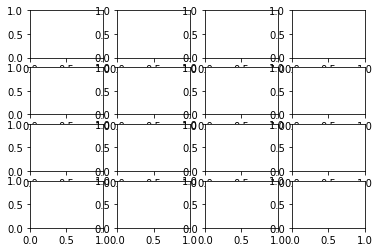

### Step 5:  Train an MLP with default hyperparameters.

For the following, you'll be using sklearn's built in Multi-layer Perceptron classifier [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

Use the default hyperparams aside from `max_iter`. `max_iter` is how many iterations of training the ANN goes though until it manually stops. The default `max_iter=200` is too long for our data currently. 

**Use random_state as the random_states and max_iter=20**. The detault parameters will use a single hidden layer.



In [64]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=20)
mlp.fit(X, Y)
y_pred = mlp.predict(X_test)
mlp.score(X_train, y_train)

0.9977762172284644

ValueError: cannot reshape array of size 30 into shape (28,28)

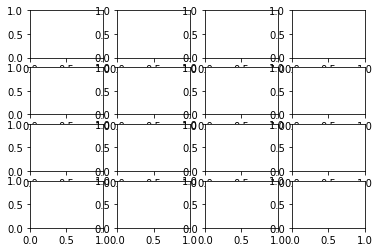

In [65]:

## Ignore playing around with plotting
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

### Step 6:  Evaluate the model on the test dataset using a confusion matrix and a classification report

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[59613,    88],
       [   45,    64]], dtype=int64)

In [51]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59701
           1       0.42      0.59      0.49       109

    accuracy                           1.00     59810
   macro avg       0.71      0.79      0.74     59810
weighted avg       1.00      1.00      1.00     59810



If all went well, your model should have an accuracy of almost 100%. Use `classification_report` to explain what you think happened. Is the model performing well? If not, is it overfitting or underfitting? Remember that the classes in the problem are very imbalanced, but out main goal is to detect fraud (class 1).

**Note**: `classification_report` outputs Precision, Recall and F1 for both classes. Remember that how we calculate these metrics depends on which class we treat as the positive class. If we say Class 0 is the positive class, a FP means incorrectly predicting Class 0, but for Class 1 a FP is incorrectly predicting Class 1.

Averages are in line with not overfitting

## 3) Hyperparameters (Group)

**Hyperparams**:

ANNs have *a lot* of hyperparams. This can include simple things such as the number of layers and nodes, up to tuning the learning rate and the gradient descent algorithm used. 

Unfortunately, there is no tried an true method for selecting hyperparams for a neural network. It requires a lot of experimentation and intution through experience. (In fact, one of the most successful methods in training neural networks is *Graduate Student Descent*, where you simply give the laborious process of tuning to a graduate student while you go and do more research!)

For now, the paramaters that you should explore are:

* `activation`: The activation function of the the ANN. Defaults to ReLU.
* `max_iter`: The ANN will train iterations until either the loss stops improving by a specified threshold, or `max_iters` is reached. Warning: the more you increase this, the more the training time will take! Patience is a virtue.
* `hidden_layer_sizes`: A tuple representing the structure of the hidden layers. For example, giving the tuple `(100,50)` means that there's two hidden layers: the first being of size 100, and the second being of size 50. The tuple (100,) would mean a single hidden layer of size 100.

**Try different permutations of these hyperprams and see how it affects the classification scores of your model.**

Answer the following questions:
1. What criteria did you use to determine which model hyperparameters performed "best"? Why? Justify your answer with respect to the problem: fraud detection.
2. What hyperparameters performed best. Why do you think they performed best?